<a href="https://colab.research.google.com/github/hetal-tiwari/Resume-Recommendation-System/blob/main/linear_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving resume_dataset.csv to resume_dataset.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [ ]:
import numpy as np 
import pandas as pd
df = pd.read_csv('resume_dataset.csv' ,encoding='utf-8')
df['cleaned_resume'] = ''
df.head()


,ID,Category,Resume,cleaned_resume
0,1,Data Science,Skills * Programming Languages: Python (pandas...,
1,2,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,3,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,4,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,5,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [ ]:
print ("Displaying the distinct categories of resume -")
print (df['Category'].unique())

Displaying the distinct categories of resume -
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [ ]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (df['Category'].value_counts())


Displaying the distinct categories of resume and the number of records belonging to each category -
Java Developer               14
HR                           11
Database                     11
Advocate                     10
Data Science                 10
Automation Testing            7
Testing                       7
DevOps Engineer               7
Hadoop                        7
DotNet Developer              7
Arts                          6
Civil Engineer                6
Python Developer              6
Business Analyst              6
SAP Developer                 6
Health and fitness            6
Network Security Engineer     5
ETL Developer                 5
Blockchain                    5
Mechanical Engineer           5
Sales                         5
Electrical Engineering        5
Web Designing                 5
Operations Manager            4
PMO                           3
Name: Category, dtype: int64


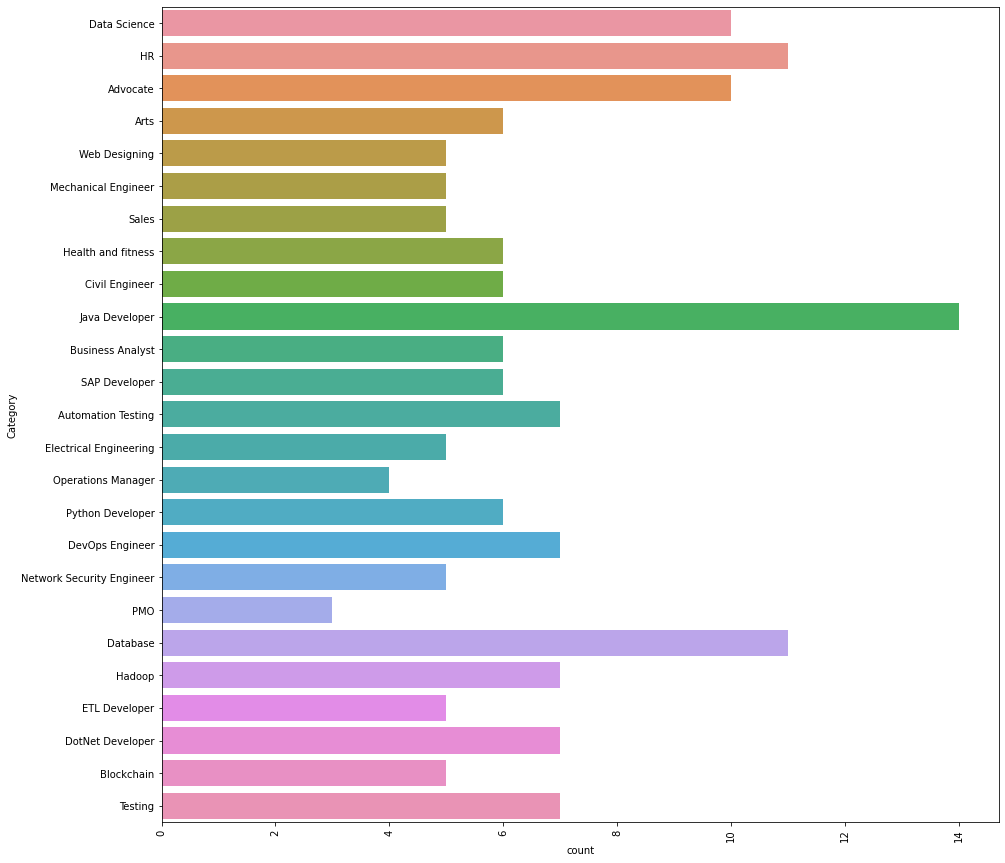

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df)

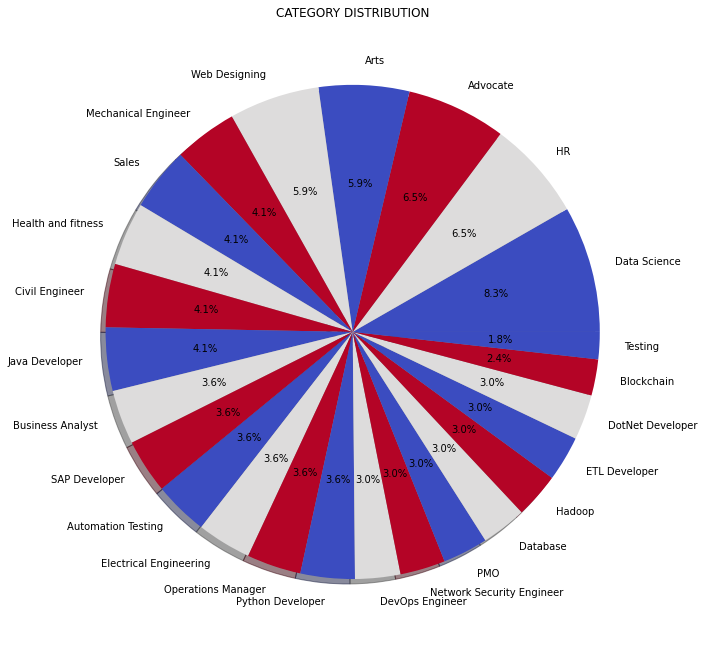

In [ ]:
from matplotlib.gridspec import GridSpec
targetCounts = df['Category'].value_counts()
targetLabels  = df['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()


In [ ]:
df['Resume']=df['Resume'].str.lower()
print(df['Resume'])

0      skills * programming languages: python (pandas...
1      education details \r\nmay 2013 to may 2017 b.e...
2      areas of interest deep learning, control syste...
3      skills â¢ r â¢ python â¢ sap hana â¢ table...
4      education details \r\n mca   ymcaust,  faridab...
                             ...                        
164    computer skills: â¢ proficient in ms office (...
165    â willingness to accept the challenges. â ...
166    personal skills â¢ quick learner, â¢ eagerne...
167    computer skills & software knowledge ms-power ...
168    skill set os windows xp/7/8/8.1/10 database my...
Name: Resume, Length: 169, dtype: object


In [ ]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [ ]:
df['cleaned_resume'] = df['Resume'].apply(lambda x: cleanResume(x))
print (df['cleaned_resume'][31])

 good communication skill quick learner keen to find solutionseducation details mba marketing and international business management pune maharashtra pune university b tech tech nagpur maharashtra rtm nagpur universityg m arts commerce scienceg m arts commerce scienceskill details company details company samarth college description of engineering 30 7 210 5 college to campus vj college of pharmacy 10 days workshop 10 g m arts commerce science 6 soft skills 6 days workshop 6 college personality g m institute of agricultural 7 6 days workshop 6 development diploma 8 soft skills samarth college of polytechnic 20 days workshop 20 total 350 working experience in corporate sr no topic company no of days total hrs 1 presentation skill team elringklinger automotives pvt 1 day 8 building workshop ltd ranjangaon pune 2 negotiation skill kubler automation pvt ltd 2 days 16 communication skill chakan pune 3 business communication finanza home loans pimple 3 days 21 stress management saudagar pune 4

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[('exprience', 601), ('company', 571), ('project', 532), ('description', 521), ('months', 509), ('details', 508), ('data', 374), ('1', 345), ('management', 303), ('team', 268), ('database', 265), ('sql', 232), ('year', 230), ('system', 216), ('maharashtra', 215), ('6', 210), ('using', 206), ('less', 204), ('business', 195), ('development', 182), ('server', 182), ('testing', 176), ('january', 174), ('ltd', 174), ('test', 174), ('client', 164), ('skills', 156), ('application', 152), ('c', 148), ('java', 147), ('engineering', 147), ('work', 147), ('pune', 147), ('responsibilities', 144), ('pvt', 143), ('education', 139), ('technical', 136), ('environment', 136), ('software', 129), ('reports', 126), ('india', 126), ('services', 125), ('working', 125), ('like', 123

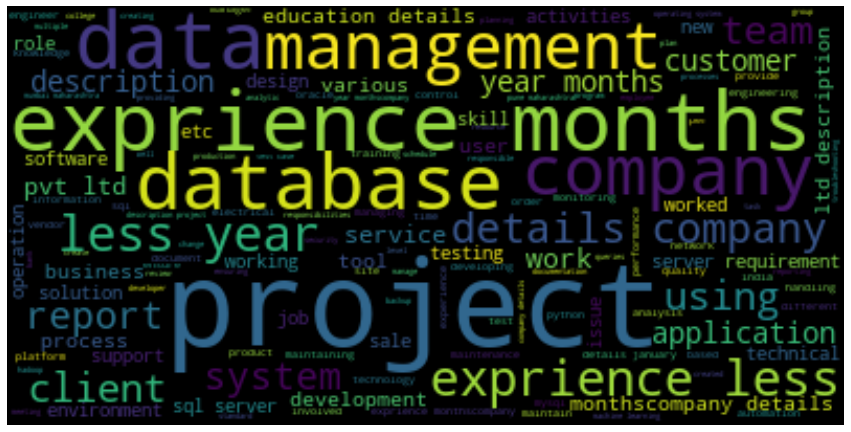

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
  

import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['cleaned_resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
print ("CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS")


CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

features = df['cleaned_resume'].values
labels = df['Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(features)
ft = word_vectorizer.transform(features)

print ("Feature completed .....")


X_train,X_test,y_train,y_test = train_test_split(ft,labels,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)




Feature completed .....
(126, 1500)
(126,)
(43, 1500)
(43,)


In [ ]:
print(X_train)


  (0, 840)	0.48558214094125934
  (0, 642)	0.4429586565794595
  (0, 466)	0.2427510479405496
  (0, 449)	0.15218086556100283
  (0, 397)	0.2658470992013097
  (0, 389)	0.12667756718894957
  (0, 274)	0.21448376572616298
  (0, 261)	0.26734625950503266
  (0, 126)	0.5307648551166729
  (1, 1495)	0.16961867774214906
  (1, 1486)	0.10017952348717493
  (1, 1480)	0.05177689635640089
  (1, 1471)	0.09613054090041068
  (1, 1447)	0.08543692861236057
  (1, 1438)	0.06790300298087883
  (1, 1388)	0.07173676874623988
  (1, 1385)	0.08690919500536572
  (1, 1378)	0.09519985936067243
  (1, 1377)	0.06880536786836382
  (1, 1374)	0.10017952348717493
  (1, 1356)	0.08332429986396829
  (1, 1353)	0.08729220790900827
  (1, 1352)	0.10607446089158817
  (1, 1350)	0.07507845325580127
  (1, 1349)	0.06760194265614575
  :	:
  (125, 882)	0.05948469255580124
  (125, 881)	0.16068894367631484
  (125, 817)	0.1953267592822928
  (125, 815)	0.12304006648774081
  (125, 761)	0.1463855132856583
  (125, 732)	0.1244745983778486
  (125, 676)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models=[
    LinearSVC()
]

In [ ]:
CV=5
cv_df=pd.DataFrame(index=range(CV*len(models)))
entries=[]

In [ ]:
for model in models:
    model_name=model.__class__.__name__
    accuracies=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=CV)
    for fold_idx,accuracy in enumerate(accuracies):
        entries.append((model_name,fold_idx,accuracy))
cv_idf=pd.DataFrame(entries,columns=['model_name','fold_idx','accuracy'])


In [ ]:
accuracies

array([0.80769231, 0.76      , 0.84      , 0.6       , 0.8       ])